## Exercise one: Identifying handwritten numbers

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

## Prepare data

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#To see the shape of the variables
print(x_train.shape)

(60000, 28, 28)


In [4]:
# Model / data parameters
num_classes = 10
input_shape = (784,)

# flatten the data from 28*28 to 1*784
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 


x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (60000, 10)
y_test shape: (10000, 10)


## Build the model

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
import tensorflow

In [14]:
tensorflow.__version__

'2.0.0'

## Train the model

In [15]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 2s 47us/sample - loss: 0.4029 - accuracy: 0.8852 - val_loss: 0.3027 - val_accuracy: 0.9178
Epoch 2/12
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3082 - accuracy: 0.9133 - val_loss: 0.2887 - val_accuracy: 0.9181
Epoch 3/12
48000/48000 [==============================] - 2s 33us/sample - loss: 0.2941 - accuracy: 0.9171 - val_loss: 0.2844 - val_accuracy: 0.9236
Epoch 4/12
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2873 - accuracy: 0.9208 - val_loss: 0.2867 - val_accuracy: 0.9208
Epoch 5/12
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2807 - accuracy: 0.9210 - val_loss: 0.2984 - val_accuracy: 0.9158
Epoch 6/12
48000/48000 [==============================] - 1s 28us/sample - loss: 0.2779 - accuracy: 0.9221 - val_loss: 0.2884 - val_accuracy: 0.9218
Epoch 7/12
48000/48000 [==============================] 

## Plot

In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


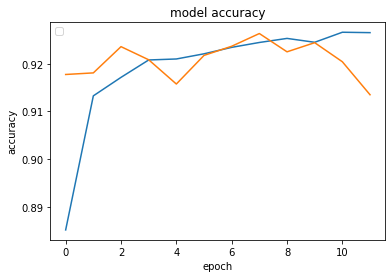

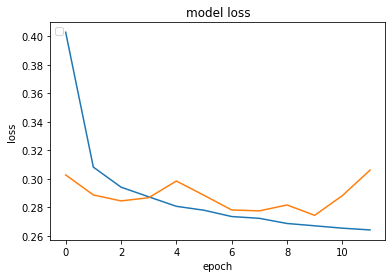

In [17]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Evaluate the trained model

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.3212557218849659
Test accuracy: 0.9097


## Changing model parameters: Add rectified activation function

In [19]:
# add rectified activation in the first hidden layer
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3155 - accuracy: 0.9114 - val_loss: 0.1770 - val_accuracy: 0.9498
Epoch 2/12
48000/48000 [==============================] - 1s 26us/sample - loss: 0.1432 - accuracy: 0.9579 - val_loss: 0.1294 - val_accuracy: 0.9625
Epoch 3/12
48000/48000 [==============================] - 1s 27us/sample - loss: 0.0990 - accuracy: 0.9709 - val_loss: 0.1043 - val_accuracy: 0.9691
Epoch 4/12
48000/48000 [==============================] - 1s 27us/sample - loss: 0.0746 - accuracy: 0.9781 - val_loss: 0.0950 - val_accuracy: 0.9708
Epoch 5/12
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0580 - accuracy: 0.9830 - val_loss: 0.0906 - val_accuracy: 0.9743
Epoch 6/12
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0459 - accuracy: 0.9864 - val_loss: 0.0900 - val_accuracy: 0.9752
Epoch 7/12
48000/48000 [==============================] 

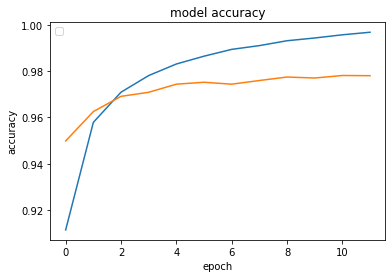

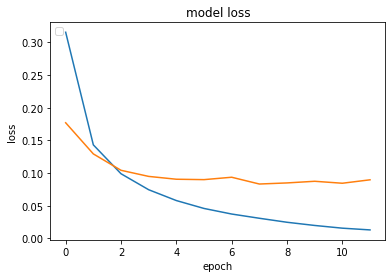

In [21]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [37]:
print(model.evaluate(x=x_test,y=y_test,verbose = 0))
print(model2.evaluate(x=x_test,y=y_test))



[0.06878998063788168, 0.981]


NameError: name 'model2' is not defined

In [33]:
for i in range(10):
    x = x_test[i].reshape(1,784)
    y = np.argmax(model.predict(x),axis =-1)
    print(i,y)

0 [7]
1 [2]
2 [1]
3 [0]
4 [4]
5 [1]
6 [4]
7 [9]
8 [5]
9 [9]


In [32]:
x_test[0].shape

(784,)